In [4]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns

In [5]:
# use pandas to import csv file
df = pd.read_csv("clean3_car_price.csv")
# too see max columns
pd.set_option('display.max_columns',None)
# print dataframe
df

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,zscore
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226.0,Diesel,Manual,1,2017.0,1956.0,5.0,-0.083515
1,1,Renault Duster RXZ Turbo CVT,12.83,13248.0,Petrol,Automatic,1,2021.0,1330.0,5.0,0.058409
2,2,Toyota Camry 2.5 G,16.40,60343.0,Petrol,Automatic,1,2016.0,2494.0,5.0,0.239361
3,4,Volkswagen Polo 1.2 MPI Highline,5.15,69414.0,Petrol,Manual,1,2016.0,1199.0,5.0,-0.330867
4,5,Volkswagen Vento 1.2 TSI Highline AT,7.66,49719.0,Petrol,Automatic,1,2017.0,1197.0,5.0,-0.203643
...,...,...,...,...,...,...,...,...,...,...,...
5466,5525,BMW X1 sDrive 20d xLine,28.90,45000.0,Diesel,Automatic,1,2018.0,2995.0,7.0,0.872949
5467,5526,BMW M Series M4 Coupe,64.90,29000.0,Petrol,Automatic,2,2015.0,1968.0,5.0,2.697682
5468,5527,Jaguar XF 2.2 Litre Luxury,13.75,90000.0,Diesel,Automatic,2,2013.0,2755.0,5.0,0.105041
5469,5528,BMW 7 Series 730Ld,29.90,79000.0,Diesel,Automatic,3,2015.0,2967.0,6.0,0.923636


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5471 entries, 0 to 5470
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5471 non-null   int64  
 1   car_name             5471 non-null   object 
 2   car_prices_in_rupee  5471 non-null   float64
 3   kms_driven           5471 non-null   float64
 4   fuel_type            5471 non-null   object 
 5   transmission         5471 non-null   object 
 6   ownership            5471 non-null   int64  
 7   manufacture          5471 non-null   float64
 8   engine               5471 non-null   float64
 9   Seats                5471 non-null   float64
 10  zscore               5471 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 470.3+ KB


In [7]:
#New dataframe 
new_df = df
#Checking for null values 
print(new_df.isnull().sum()) 
print("Missing values distribution: ")
print(new_df.isnull().mean())

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
zscore                 0
dtype: int64
Missing values distribution: 
Unnamed: 0             0.0
car_name               0.0
car_prices_in_rupee    0.0
kms_driven             0.0
fuel_type              0.0
transmission           0.0
ownership              0.0
manufacture            0.0
engine                 0.0
Seats                  0.0
zscore                 0.0
dtype: float64


In [8]:
# #Checking for duplicates
print(new_df.duplicated().any()) 

False


In [9]:
print(new_df.duplicated())
print(new_df.shape) 

0       False
1       False
2       False
3       False
4       False
        ...  
5466    False
5467    False
5468    False
5469    False
5470    False
Length: 5471, dtype: bool
(5471, 11)


In [10]:
#Finding unique values in "Region" 
print(new_df["transmission"].unique()) 

['Manual' 'Automatic']


In [11]:
#Replacing string values with integer 
new_df["transmission"].replace({"Manual":"1", "Automatic":"0"}, inplace = True) 
print(new_df.head())

   Unnamed: 0                                car_name  car_prices_in_rupee  \
0           0  Jeep Compass 2.0 Longitude Option BSIV                10.03   
1           1            Renault Duster RXZ Turbo CVT                12.83   
2           2                      Toyota Camry 2.5 G                16.40   
3           4        Volkswagen Polo 1.2 MPI Highline                 5.15   
4           5    Volkswagen Vento 1.2 TSI Highline AT                 7.66   

   kms_driven fuel_type transmission  ownership  manufacture  engine  Seats  \
0     86226.0    Diesel            1          1       2017.0  1956.0    5.0   
1     13248.0    Petrol            0          1       2021.0  1330.0    5.0   
2     60343.0    Petrol            0          1       2016.0  2494.0    5.0   
3     69414.0    Petrol            1          1       2016.0  1199.0    5.0   
4     49719.0    Petrol            0          1       2017.0  1197.0    5.0   

     zscore  
0 -0.083515  
1  0.058409  
2  0.239361  


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_14676\2328573904.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df["transmission"].replace({"Manual":"1", "Automatic":"0"}, inplace = True)


In [12]:
#Finding unique values in "Region" 
print(new_df["fuel_type"].unique()) 

['Diesel' 'Petrol' 'Cng' 'Electric' 'Lpg']


In [13]:
#Replacing string values with integer 
new_df["fuel_type"].replace({"Diesel":"0", "Petrol":"1", "Cng":"2", "Electric":"3", "Lpg":"4"}, inplace = True) 
print(new_df.head())

   Unnamed: 0                                car_name  car_prices_in_rupee  \
0           0  Jeep Compass 2.0 Longitude Option BSIV                10.03   
1           1            Renault Duster RXZ Turbo CVT                12.83   
2           2                      Toyota Camry 2.5 G                16.40   
3           4        Volkswagen Polo 1.2 MPI Highline                 5.15   
4           5    Volkswagen Vento 1.2 TSI Highline AT                 7.66   

   kms_driven fuel_type transmission  ownership  manufacture  engine  Seats  \
0     86226.0         0            1          1       2017.0  1956.0    5.0   
1     13248.0         1            0          1       2021.0  1330.0    5.0   
2     60343.0         1            0          1       2016.0  2494.0    5.0   
3     69414.0         1            1          1       2016.0  1199.0    5.0   
4     49719.0         1            0          1       2017.0  1197.0    5.0   

     zscore  
0 -0.083515  
1  0.058409  
2  0.239361  


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_14676\2106521590.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df["fuel_type"].replace({"Diesel":"0", "Petrol":"1", "Cng":"2", "Electric":"3", "Lpg":"4"}, inplace = True)


In [14]:
#Describing data after preprocessing 
print(new_df.shape) 
print(new_df.head())

(5471, 11)
   Unnamed: 0                                car_name  car_prices_in_rupee  \
0           0  Jeep Compass 2.0 Longitude Option BSIV                10.03   
1           1            Renault Duster RXZ Turbo CVT                12.83   
2           2                      Toyota Camry 2.5 G                16.40   
3           4        Volkswagen Polo 1.2 MPI Highline                 5.15   
4           5    Volkswagen Vento 1.2 TSI Highline AT                 7.66   

   kms_driven fuel_type transmission  ownership  manufacture  engine  Seats  \
0     86226.0         0            1          1       2017.0  1956.0    5.0   
1     13248.0         1            0          1       2021.0  1330.0    5.0   
2     60343.0         1            0          1       2016.0  2494.0    5.0   
3     69414.0         1            1          1       2016.0  1199.0    5.0   
4     49719.0         1            0          1       2017.0  1197.0    5.0   

     zscore  
0 -0.083515  
1  0.058409  
2  

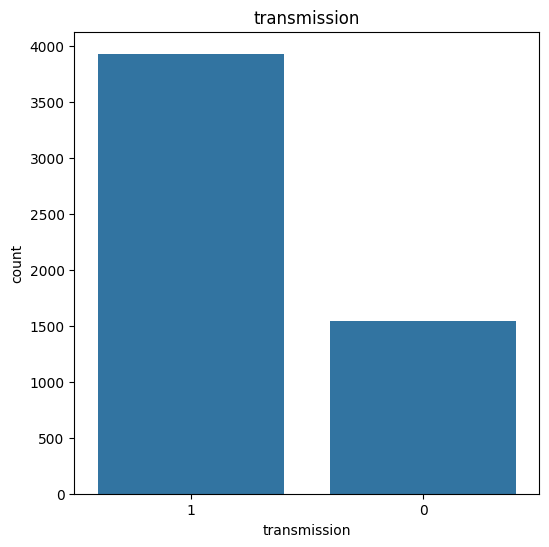

In [15]:

new_df.transmission.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='transmission', data=new_df)
plt.title('transmission')
plt.show()

In [18]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [19]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [23]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (700, 2)
Number transactions y_train dataset:  (700,)
Number transactions X_test dataset:  (300, 2)
Number transactions y_test dataset:  (300,)
